In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
img =cv2.imread("blackBG.jpg")

In [3]:
# 颜色表：红橙黄绿青蓝紫灰
colormap = [(0,0,255),(0,165,255),(0,255,255),(0,255,0),(255,255,0),(255,0,0),(238,130,238),(190,190,190)]

In [4]:
# grayscale 
# https://docs.opencv.org/4.5.0/d7/d4d/tutorial_py_thresholding.html
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,bin_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [-1  1 -1 -1]]]


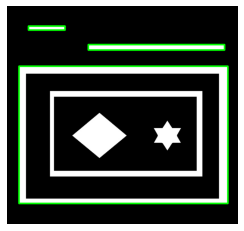

In [5]:
# RETR_EXTERNAL:仅外圈轮廓
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_show = img.copy()
cv2.drawContours(img_show,contours,-1,(0,255,0),5)
plt.imshow(img_show[...,::-1])
plt.axis('off')

print(hierarchy)

In [6]:
contours

[array([[[ 50, 253]],
 
        [[ 50, 831]],
 
        [[930, 831]],
 
        [[930, 253]]], dtype=int32),
 array([[[342, 162]],
 
        [[342, 185]],
 
        [[916, 185]],
 
        [[916, 162]]], dtype=int32),
 array([[[ 90,  84]],
 
        [[ 90, 101]],
 
        [[244, 101]],
 
        [[244,  84]]], dtype=int32)]

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]


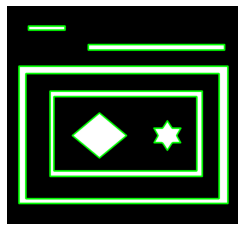

In [6]:
# RETR_EXTERNAL:全部轮廓，无层级关系
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img_show = img.copy()
cv2.drawContours(img_show,contours,-1,(0,255,0),5)
plt.imshow(img_show[...,::-1])
plt.axis('off')

print(hierarchy)

In [7]:
hierarchy.shape

(1, 8, 4)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 4  1  3 -1]
  [-1 -1 -1  2]
  [ 6  2  5 -1]
  [-1 -1 -1  4]
  [ 7  4 -1 -1]
  [-1  6 -1 -1]]]


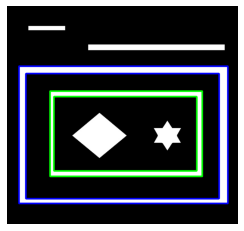

In [8]:
# RETR_CCOMP:全部轮廓，只有两种层级关系
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

img_show = img.copy()
for i in range(len(contours)):
    if(hierarchy[0,i,3]!=-1):
        cv2.drawContours(img_show,contours,i,colormap[i],5)
        cv2.drawContours(img_show,contours,hierarchy[0,i,3],colormap[i],5)
plt.imshow(img_show[...,::-1])
plt.axis('off')

print(hierarchy)
# 红:0  橙;1  黄:2  绿:3  青:4  蓝:5  紫:6  灰:7

[[[ 6 -1  1 -1]
  [-1 -1  2  0]
  [-1 -1  3  1]
  [-1 -1  4  2]
  [ 5 -1 -1  3]
  [-1  4 -1  3]
  [ 7  0 -1 -1]
  [-1  6 -1 -1]]]


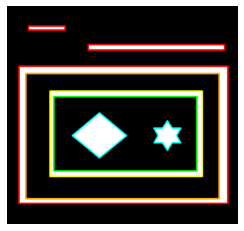

In [9]:
# RetrievalModes:https://docs.opencv.org/4.5.0/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71
#ContourApproximationModes:https://docs.opencv.org/4.5.0/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_show = img.copy()
for i in range(len(contours)):
    cv2.drawContours(img_show,contours,i,colormap[hierarchy[0,i,3]+1],5)
plt.imshow(img_show[...,::-1])
plt.axis('off')

print(hierarchy)
# 红:0  橙;1  黄:2  绿:3  青:4  蓝:5  紫:6  灰:7

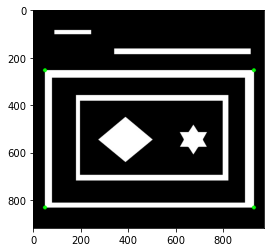

In [10]:
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_show = img.copy()
cnt_idx = 0
cnt = contours[cnt_idx]
for i in range(cnt.shape[0]):
    cv2.circle(img_show,(cnt[i,0,0],cnt[i,0,1]),5,(0,255,0),5)
plt.imshow(img_show[...,::-1])

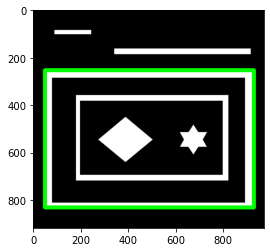

In [11]:
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_show = img.copy()
cnt_idx = 0
cnt = contours[cnt_idx]
for i in range(cnt.shape[0]):
    cv2.circle(img_show,(cnt[i,0,0],cnt[i,0,1]),5,(0,255,0),5)
plt.imshow(img_show[...,::-1])

## 多边形逼近

False


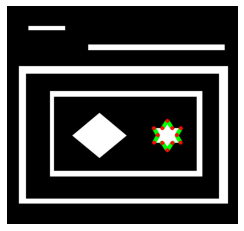

In [12]:
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_show = img.copy()
cnt_idx = 4
cnt = contours[cnt_idx]
for i in range(cnt.shape[0]):
    cv2.circle(img_show,(cnt[i,0,0],cnt[i,0,1]),5,(0,255,0),5)

epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)
for i in range(approx.shape[0]):
    cv2.circle(img_show,(approx[i,0,0],approx[i,0,1]),5,(0,0,255),5)

plt.imshow(img_show[...,::-1])
plt.axis('off')

print(cv2.isContourConvex(approx))

## 凸多边形逼近

True


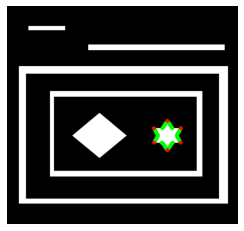

In [13]:
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_show = img.copy()
cnt_idx = 4
cnt = contours[cnt_idx]
for i in range(cnt.shape[0]):
    cv2.circle(img_show,(cnt[i,0,0],cnt[i,0,1]),5,(0,255,0),5)

approx = cv2.convexHull(cnt)
for i in range(approx.shape[0]):
    cv2.circle(img_show,(approx[i,0,0],approx[i,0,1]),5,(0,0,255),5)

plt.imshow(img_show[...,::-1])
plt.axis('off')
print(cv2.isContourConvex(approx))

(-0.5, 972.5, 917.5, -0.5)

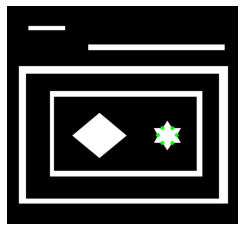

In [14]:
contours, hierarchy = cv2.findContours(bin_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt_idx = 4
cnt = contours[cnt_idx]
approx = cv2.convexHull(cnt,returnPoints=False)
defect = cv2.convexityDefects(cnt,approx)

img_show = img.copy()
for i in range(defect.shape[0]):
    pos_idx = defect[i,0,2]
    cv2.circle(img_show,(cnt[pos_idx,0,0],cnt[pos_idx,0,1]),5,(0,255,0),5)
plt.imshow(img_show[...,::-1])
plt.axis('off')

# 边界框

(-0.5, 972.5, 917.5, -0.5)

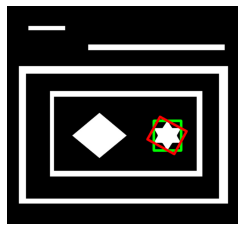

In [15]:
img_show = img.copy()
#无旋转矩形
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(img_show,(x,y),(x+w,y+h),(0,255,0),10)
#有旋转矩形
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_show,[box],0,(0,0,255),10)

plt.imshow(img_show[...,::-1])
plt.axis('off')

(-0.5, 972.5, 917.5, -0.5)

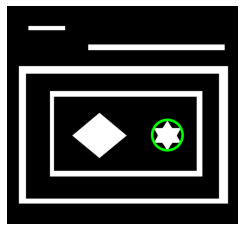

In [16]:
# 最小外接圆
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)

img_show = img.copy()
cv2.circle(img_show,center,radius,(0,255,0),10)
plt.imshow(img_show[...,::-1])
plt.axis('off')

(-0.5, 972.5, 917.5, -0.5)

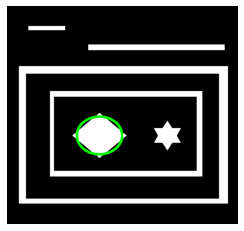

In [17]:
# 椭圆拟合
ellipse = cv2.fitEllipse(contours[5])

img_show = img.copy()
cv2.ellipse(img_show,ellipse,(0,255,0),10)
plt.imshow(img_show[...,::-1])
plt.axis('off')

(-0.5, 972.5, 917.5, -0.5)

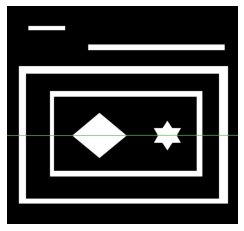

In [18]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)

img_show = img.copy()
cv2.line(img_show,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(img_show[...,::-1])
plt.axis('off')

(-0.5, 972.5, 917.5, -0.5)

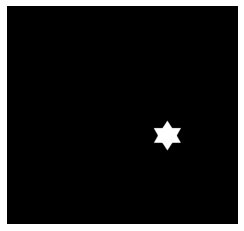

In [24]:
mask = np.zeros(gray_img.shape,np.uint8)
cv2.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)
plt.imshow(mask,cmap='gray')
plt.axis('off')

## 形状匹配

0.14475720763533126 0.3168697153308031


(-0.5, 139.5, 134.5, -0.5)

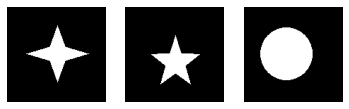

In [31]:
img1 = cv2.imread('shape1.png',0)
img2 = cv2.imread('shape2.png',0)
img3 = cv2.imread('shape3.png',0)
ret, thresh = cv2.threshold(img1, 127, 255,0)
ret, thresh2 = cv2.threshold(img2, 127, 255,0)
ret, thresh3 = cv2.threshold(img3, 127, 255,0)
contours,hierarchy = cv2.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv2.findContours(thresh2,2,1)
cnt2 = contours[0]
contours,hierarchy = cv2.findContours(thresh3,2,1)
cnt3 = contours[0]
ret1 = cv2.matchShapes(cnt1,cnt2,1,0.0)
ret2 = cv2.matchShapes(cnt1,cnt3,1,0.0)
print( ret1,ret2 )
plt.subplot(131)
plt.imshow(img1,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(img3,cmap='gray')
plt.axis('off')